# Limpieza y Análisis exploratorio de datos (EDA)

## Union y consolidazon de 5 csv

En esta notebook se desarrollará la unión de los CSV sobre las 5 estaciones meteorológicas de Mendoza, así como procesos de limpieza de datos y reestructuración de dataframe.

In [1]:
import pandas as pd
import glob
import os

print("Iniciando consolidación de datos...")

# Creamos la ruta correcta para encontrar los archivos desde la carpeta 'notebooks/'
ruta_a_los_datos = "../data/raw/station_*.csv"
archivos_estaciones = glob.glob(ruta_a_los_datos)

if archivos_estaciones:
    print(f"Se encontraron {len(archivos_estaciones)} archivos de estaciones para consolidar.")
    
    lista_df_estaciones = [pd.read_csv(archivo) for archivo in archivos_estaciones]
    
    # Unimos todos los dataframes en uno solo
    df_final_raw = pd.concat(lista_df_estaciones, ignore_index=True)
    
    # Pivotamos la tabla para darle el formato final
    df_final_procesado = df_final_raw.pivot_table(index=['date', 'station_name'], columns='datatype', values='value').reset_index()

    # --- Guardamos el nuevo dataset consolidado en la carpeta 'processed' ---
    # Creamos la carpeta 'processed' si no existe
    os.makedirs("../data/processed/", exist_ok=True)
    
    ruta_salida = "../data/processed/datos_noaa_mendoza_consolidado.csv"
    df_final_procesado.to_csv(ruta_salida, index=False)
    
    print(f"\n✅ ¡Éxito! Dataset consolidado guardado en:")
    print(f"'{ruta_salida}'")
    
    print("\n--- Muestra del Dataset Final ---")
    display(df_final_procesado.head()) # 'display()' es mejor que 'print()' para dataframes en notebooks
else:
    print("❌ No se encontraron archivos de checkpoint en '../data/raw/' para consolidar.")

Iniciando consolidación de datos...
Se encontraron 5 archivos de estaciones para consolidar.

✅ ¡Éxito! Dataset consolidado guardado en:
'../data/processed/datos_noaa_mendoza_consolidado.csv'

--- Muestra del Dataset Final ---


datatype,date,station_name,PRCP,SNWD,TAVG,TMAX,TMIN
0,2000-01-01T00:00:00,"MALARGUE, AR",NaN,NaN,20.8,NaN,12.7
1,2000-01-01T00:00:00,"MENDOZA AERO, AR",NaN,NaN,24.4,32.8,17.0
2,2000-01-01T00:00:00,"SAN MARTIN, AR",0.0,NaN,24.1,NaN,17.5
3,2000-01-01T00:00:00,"SAN RAFAEL, AR",3.0,NaN,22.3,31.0,15.2
4,2000-01-02T00:00:00,"MALARGUE, AR",0.0,NaN,20.8,28.9,11.4


Vemos un poco de información del dataframe obtenido

In [3]:
df_final_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37399 entries, 0 to 37398
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          37399 non-null  object 
 1   station_name  37399 non-null  object 
 2   PRCP          9668 non-null   float64
 3   SNWD          225 non-null    float64
 4   TAVG          37397 non-null  float64
 5   TMAX          19599 non-null  float64
 6   TMIN          35148 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.0+ MB


## Analisis Exploratorio

Carga y Vistazo Inicial

In [4]:
import pandas as pd
import numpy as np

# Cargamos nuestro nuevo dataset consolidado
ruta_datos = "../data/processed/datos_noaa_mendoza_consolidado.csv"
df = pd.read_csv(ruta_datos)

# --- Vistazo General ---
print("--- Información General del Dataset ---")
df.info()

print("\n\n--- Primeras 5 Filas ---")
display(df.head())

print("\n\n--- Resumen Estadístico (solo columnas numéricas) ---")
display(df.describe())

--- Información General del Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37399 entries, 0 to 37398
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          37399 non-null  object 
 1   station_name  37399 non-null  object 
 2   PRCP          9668 non-null   float64
 3   SNWD          225 non-null    float64
 4   TAVG          37397 non-null  float64
 5   TMAX          19599 non-null  float64
 6   TMIN          35148 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.0+ MB


--- Primeras 5 Filas ---


,date,station_name,PRCP,SNWD,TAVG,TMAX,TMIN
0,2000-01-01T00:00:00,"MALARGUE, AR",NaN,NaN,20.8,NaN,12.7
1,2000-01-01T00:00:00,"MENDOZA AERO, AR",NaN,NaN,24.4,32.8,17.0
2,2000-01-01T00:00:00,"SAN MARTIN, AR",0.0,NaN,24.1,NaN,17.5
3,2000-01-01T00:00:00,"SAN RAFAEL, AR",3.0,NaN,22.3,31.0,15.2
4,2000-01-02T00:00:00,"MALARGUE, AR",0.0,NaN,20.8,28.9,11.4




--- Resumen Estadístico (solo columnas numéricas) ---


,PRCP,SNWD,TAVG,TMAX,TMIN
count,9668.000000,225.000000,37397.000000,19599.000000,35148.000000
mean,2.966922,94.226667,15.964219,24.597847,8.611156
std,10.291487,203.488191,7.138523,7.616639,7.048944
min,0.000000,10.000000,-9.600000,-1.800000,-16.000000
25%,0.000000,10.000000,10.300000,19.000000,3.000000
50%,0.000000,30.000000,16.000000,25.000000,8.500000
75%,2.000000,89.000000,21.700000,30.800000,14.200000
max,231.900000,2050.000000,36.500000,44.400000,27.400000


Limpieza Esencial

In [5]:
# --- Limpieza de la Columna 'date' ---
# Convertimos la columna a formato de fecha y eliminamos la parte de la hora (T00:00:00)
df['date'] = pd.to_datetime(df['date']).dt.date
print("Formato de la columna 'date' corregido.")

# --- Análisis de Valores Faltantes ---
print("\n\n--- Conteo de Valores Faltantes por Columna ---")
# Contamos cuántos valores nulos (NaN) hay en cada columna
valores_faltantes = df.isnull().sum()
print(valores_faltantes[valores_faltantes > 0].sort_values(ascending=False))

Formato de la columna 'date' corregido.


--- Conteo de Valores Faltantes por Columna ---
SNWD    37174
PRCP    27731
TMAX    17800
TMIN     2251
TAVG        2
dtype: int64


In [ ]:
Crear la Variable Objetivo

In [7]:
# Rellenamos los valores NaN en las columnas de eventos (WT) que SÍ existan.
wt_cols = [col for col in df.columns if 'WT' in col]
if wt_cols:
    df[wt_cols] = df[wt_cols].fillna(0)
    print(f"Columnas de eventos encontradas y rellenadas: {wt_cols}")
else:
    print("No se encontraron columnas de eventos (WT) en el dataset.")

# --- Lógica Robusta para Crear la Variable Objetivo ---
# Verificamos la existencia de las columnas de granizo
wt04_existe = 'WT04' in df.columns
wt05_existe = 'WT05' in df.columns

if wt04_existe and wt05_existe:
    print("Se encontraron las columnas WT04 y WT05. Creando 'granizo' a partir de ambas.")
    df['granizo'] = ((df['WT04'] == 1.0) | (df['WT05'] == 1.0)).astype(int)
elif wt04_existe:
    print("Solo se encontró la columna WT04. Creando 'granizo' a partir de ella.")
    df['granizo'] = (df['WT04'] == 1.0).astype(int)
elif wt05_existe:
    print("Solo se encontró la columna WT05. Creando 'granizo' a partir de ella.")
    df['granizo'] = (df['WT05'] == 1.0).astype(int)
else:
    print("¡Atención! No se encontraron columnas WT04 ni WT05. Creando columna 'granizo' con todos los valores en 0.")
    df['granizo'] = 0

print("\nColumna 'granizo' creada exitosamente.")

# Verifiquemos cuántos días con granizo hemos capturado
print("\n--- Conteo de días CON (1) y SIN (0) granizo ---")
print(df['granizo'].value_counts())

No se encontraron columnas de eventos (WT) en el dataset.
¡Atención! No se encontraron columnas WT04 ni WT05. Creando columna 'granizo' con todos los valores en 0.

Columna 'granizo' creada exitosamente.

--- Conteo de días CON (1) y SIN (0) granizo ---
granizo
0    37399
Name: count, dtype: int64


## Web Scraping - Tu Tiempo

Instalar dependencias para scrapear

In [11]:
!pip install lxml

   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------- ----------------------------- 1.0/4.0 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 14.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Crear lista de estaciones mendocinas actuales o con mas datos

In [1]:
import requests
import pandas as pd
from dotenv import load_dotenv
import os

# --- Cargar configuración ---
load_dotenv()
TOKEN = os.getenv('NOAA_TOKEN')
headers = {'token': TOKEN}
base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/"

# --- Volvemos a buscar las estaciones para tener la variable que necesitamos ---
print("Buscando la lista de estaciones de Mendoza...")
endpoint = "stations"
params = {"locationid": "FIPS:AR", "limit": 1000}
response = requests.get(base_url + endpoint, headers=headers, params=params)
response.raise_for_status()
stations_df = pd.DataFrame(response.json()['results'])

# Filtramos por coordenadas geográficas
min_lat, max_lat = -37.5, -32.0
min_lon, max_lon = -70.5, -66.5
mendoza_stations_geo = stations_df[
    (stations_df['latitude'] >= min_lat) & (stations_df['latitude'] <= max_lat) &
    (stations_df['longitude'] >= min_lon) & (stations_df['longitude'] <= max_lon)
]

# Filtramos por estaciones con datos recientes
estaciones_recientes_df = mendoza_stations_geo[
    pd.to_datetime(mendoza_stations_geo['maxdate']).dt.year >= 2010
].copy()

# Creamos el diccionario 'estaciones_objetivo' que necesita el script de scraping
estaciones_objetivo = pd.Series(
    estaciones_recientes_df.name.values, 
    index=estaciones_recientes_df.id
).to_dict()

print("\n✅ Lista de estaciones preparada. La variable 'estaciones_objetivo' ya está disponible.")
print(f"Se procesarán {len(estaciones_objetivo)} estaciones.")

Buscando la lista de estaciones de Mendoza...

✅ Lista de estaciones preparada. La variable 'estaciones_objetivo' ya está disponible.
Se procesarán 5 estaciones.


Scraping simple para conocer estructura de la pagina

In [2]:
import requests
from bs4 import BeautifulSoup

url_diagnostico = "https://www.tutiempo.net/clima/argentina.html"

print(f"Iniciando scraping de diagnóstico para: {url_diagnostico}")

try:
    response = requests.get(url_diagnostico)
    response.raise_for_status()
    soup = BeautifulSoup(response.content, 'lxml')

    # Buscamos el título para confirmar que la página cargó bien
    titulo_h1 = soup.find('h1')
    if titulo_h1:
        print(f"\n✅ Título H1 encontrado: '{titulo_h1.text.strip()}'")
    else:
        print("\n❌ No se encontró un título H1.")

    # === NUEVA LÓGICA DE BÚSQUEDA ===
    # 1. Buscamos TODOS los elementos <li> de la página
    todos_los_li = soup.find_all('li')
    
    # 2. Creamos una lista para guardar solo los que son de estaciones
    estaciones_encontradas = []

    for item_li in todos_los_li:
        # Buscamos un link <a> dentro del <li>
        link = item_li.find('a')
        
        # Verificamos si encontramos un link y si su 'href' parece ser de una estación
        if link and 'href' in link.attrs and '/clima/ws-' in link['href']:
            estaciones_encontradas.append(link)

    # 3. Reportamos el resultado
    if estaciones_encontradas:
        print(f"\n✅ ¡Éxito! Se encontraron {len(estaciones_encontradas)} links de estaciones dentro de elementos <li>.")
        print("--- Mostrando los primeros 5 para verificar la estructura ---")
        for i, link_estacion in enumerate(estaciones_encontradas):
            if i < 5:
                nombre = link_estacion.text.strip()
                href = link_estacion['href']
                print(f"  - Nombre: {nombre}, Link: {href}")
    else:
        print("\n❌ No se encontraron links de estaciones dentro de ningún elemento <li>.")

except Exception as e:
    print(f"\n❌ Ocurrió un error general durante el scraping: {e}")

Iniciando scraping de diagnóstico para: https://www.tutiempo.net/clima/argentina.html

✅ Título H1 encontrado: 'Datos climáticos: Argentina'

✅ ¡Éxito! Se encontraron 100 links de estaciones dentro de elementos <li>.
--- Mostrando los primeros 5 para verificar la estructura ---
  - Nombre: AZUL AERO, Link: /clima/ws-876410.html
  - Nombre: Azul Airport, Link: /clima/ws-876420.html
  - Nombre: B.DE IRIGOYEN AERO, Link: /clima/ws-871630.html
  - Nombre: Bahia Blanca Aerodrome, Link: /clima/ws-877500.html
  - Nombre: Bariloche Aerodrome, Link: /clima/ws-877650.html


Scraping completo por links relevantes

In [20]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time

# --- FASE 1: Encontrar los links de nuestras 5 estaciones objetivo ---

# Lista de los nombres de las estaciones que nos interesan
nombres_estaciones_mendoza = [
    "Mendoza Aerodrome",
    "Mendoza Observatori",
    "San Martin",
    "Malargue Aerodrome",
    "San Rafael Aerodrome"
]

# Diccionario para guardar los links que encontremos
links_mendoza = {}

urls_lista_estaciones = [
    "https://www.tutiempo.net/clima/argentina.html",
    "https://www.tutiempo.net/clima/argentina/2/"
]

print("Buscando los links de las 5 estaciones de Mendoza...")
for url in urls_lista_estaciones:
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'lxml')
        todos_los_li = soup.find_all('li')
        
        for item_li in todos_los_li:
            link = item_li.find('a')
            if link and 'href' in link.attrs:
                nombre_estacion = link.text.strip()
                # Verificamos si el nombre de la estación está en nuestra lista de interés
                for nombre_buscado in nombres_estaciones_mendoza:
                    if nombre_buscado.lower() in nombre_estacion.lower():
                        links_mendoza[nombre_estacion] = "https://www.tutiempo.net" + link['href']
    except Exception as e:
        print(f"Error procesando la lista de estaciones en {url}: {e}")

print(f"\n✅ Se encontraron {len(links_mendoza)} links para las estaciones de Mendoza.")


# --- FASE 2: Visitar cada link y mostrar la tabla de resumen ---

print("\n--- Analizando la estructura de las tablas anuales ---")
for nombre, url_estacion in links_mendoza.items():
    print(f"\nVisitando: {nombre} ({url_estacion})")
    try:
        # Usamos pd.read_html para buscar las tablas en la página de la estación
        tablas_estacion = pd.read_html(url_estacion)
        
        # Asumimos que la tabla de resumen es la anteúltima
        df_resumen_anual = tablas_estacion[-2]
        
        print(f"✅ Tabla encontrada para {nombre}. Mostrando las primeras 5 filas:")
        display(df_resumen_anual.head())
        
    except Exception as e:
        print(f"❌ No se pudo procesar la tabla para {nombre}. Error: {e}")
    
    time.sleep(1)

Buscando los links de las 5 estaciones de Mendoza...

✅ Se encontraron 5 links para las estaciones de Mendoza.

--- Analizando la estructura de las tablas anuales ---

Visitando: Malargue Aerodrome (https://www.tutiempo.net/clima/ws-875060.html)
✅ Tabla encontrada para Malargue Aerodrome. Mostrando las primeras 5 filas:


,Año,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
0,1967,-,-,-,-,-,-,-,-,-,-,-
1,1968,-,-,-,-,-,-,-,-,-,-,-
2,1973,-,-,-,-,-,-,-,-,-,-,-
3,1974,14.6,19.1,5.2,-,6,49,12,9,10,0,3
4,1975,14.4,19,-,-,5.8,42,19,17,12,1,0



Visitando: Mendoza Aerodrome (https://www.tutiempo.net/clima/ws-874180.html)
✅ Tabla encontrada para Mendoza Aerodrome. Mostrando las primeras 5 filas:


,Año,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
0,1957,-,-,-,-,-,-,-,-,-,-,-
1,1958,16.3,-,11.8,-,3.7,28,0,5,0,0,0
2,1965,-,-,-,-,-,-,-,-,-,-,-
3,1966,-,-,-,-,-,-,-,-,-,-,-
4,1967,-,-,-,-,-,-,-,-,-,-,-



Visitando: MENDOZA OBSERVATORI (https://www.tutiempo.net/clima/ws-874200.html)
✅ Tabla encontrada para MENDOZA OBSERVATORI. Mostrando las primeras 5 filas:


,Año,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
0,1973,-,-,-,-,-,-,-,-,-,-,-
1,1974,-,-,-,-,-,-,-,-,-,-,-
2,1975,-,-,-,-,-,-,-,-,-,-,-
3,1976,-,-,-,-,-,-,-,-,-,-,-
4,1977,-,-,-,-,-,-,-,-,-,-,-



Visitando: San Martin (https://www.tutiempo.net/clima/ws-874160.html)
✅ Tabla encontrada para San Martin. Mostrando las primeras 5 filas:


,Año,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
0,1973,-,-,-,-,-,-,-,-,-,-,-
1,1974,-,-,-,-,-,-,-,-,-,-,-
2,1975,-,-,-,-,-,-,-,-,-,-,-
3,1976,-,-,-,-,-,-,-,-,-,-,-
4,1977,-,-,-,-,-,-,-,-,-,-,-



Visitando: San Rafael Aerodrome (https://www.tutiempo.net/clima/ws-875090.html)
✅ Tabla encontrada para San Rafael Aerodrome. Mostrando las primeras 5 filas:


,Año,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
0,1973,-,-,-,-,-,-,-,-,-,-,-
1,1974,17.2,22.9,8.3,-,6.4,50,4,35,5,0,3
2,1975,-,-,-,-,-,63,7,26,3,0,2
3,1976,17,22.5,7.5,-,5.9,68,8,33,6,0,7
4,1977,17.7,23.6,9,369.33,5.2,48,4,22,4,0,1


Descarga de tablas completas para estaciones de interes

In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time

# --- (Fase 1: Encontrar los links - sin cambios) ---
nombres_estaciones_mendoza = [
    "Mendoza Aerodrome", "Mendoza Observatori", "San Martin", 
    "Malargue Aerodrome", "San Rafael Aerodrome"
]
links_mendoza = {}
urls_lista_estaciones = [
    "https://www.tutiempo.net/clima/argentina.html",
    "https://www.tutiempo.net/clima/argentina/2/"
]

for url in urls_lista_estaciones:
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'lxml')
        todos_los_li = soup.find_all('li')
        for item_li in todos_los_li:
            link = item_li.find('a')
            if link and 'href' in link.attrs:
                nombre_estacion = link.text.strip()
                for nombre_buscado in nombres_estaciones_mendoza:
                    if nombre_buscado.lower() in nombre_estacion.lower():
                        links_mendoza[nombre_estacion] = "https://www.tutiempo.net" + link['href']
    except Exception as e:
        print(f"Error procesando la lista de estaciones en {url}: {e}")

# --- FASE 2: Extraer la "Hotlist" de Años (Versión Robusta) ---

hotlist_granizo = []
print("--- Extrayendo la Hotlist de Años con Granizo ---")

for nombre, url_estacion in links_mendoza.items():
    print(f"\nProcesando: {nombre}...")
    try:
        tablas_estacion = pd.read_html(url_estacion)
        df_anual = tablas_estacion[-2]

        if 'GR' in df_anual.columns:
            # === PASO DE LIMPIEZA CLAVE ===
            # Convertimos la columna 'GR' a números. Los valores que no son números (como '-') se convertirán en NaN.
            df_anual['GR'] = pd.to_numeric(df_anual['GR'], errors='coerce')
            # Rellenamos los NaN con 0 para poder comparar.
            df_anual['GR'] = df_anual['GR'].fillna(0)

            # Ahora el filtro funciona de forma segura
            años_con_granizo = df_anual[df_anual['GR'] > 0]
            
            if not años_con_granizo.empty:
                print(f"  -> ¡Años con granizo encontrados!")
                for index, row in años_con_granizo.iterrows():
                    hotlist_granizo.append({
                        'station_name': nombre,
                        'año': int(row['Año']),
                        'eventos_reportados': int(row['GR'])
                    })
            else:
                print("  -> Sin eventos de granizo reportados en el resumen anual.")
        else:
            print("  -> La columna 'GR' no existe en esta tabla.")
            
    except Exception as e:
        print(f"❌ No se pudo procesar la tabla. Error: {e}")
    time.sleep(1)

# --- FASE 3: Mostrar el Resultado Final ---
df_hotlist = pd.DataFrame(hotlist_granizo).sort_values(by=['station_name', 'año'])

print("\n\n✅ --- Hotlist de Años a Investigar ---")
display(df_hotlist)

--- Extrayendo la Hotlist de Años con Granizo ---

Procesando: Malargue Aerodrome...
  -> ¡Años con granizo encontrados!

Procesando: Mendoza Aerodrome...
  -> ¡Años con granizo encontrados!

Procesando: MENDOZA OBSERVATORI...
  -> ¡Años con granizo encontrados!

Procesando: San Martin...
  -> ¡Años con granizo encontrados!

Procesando: San Rafael Aerodrome...
  -> ¡Años con granizo encontrados!


✅ --- Hotlist de Años a Investigar ---


,station_name,año,eventos_reportados
61,MENDOZA OBSERVATORI,2020,1
62,MENDOZA OBSERVATORI,2021,1
63,MENDOZA OBSERVATORI,2022,1
64,MENDOZA OBSERVATORI,2023,1
65,MENDOZA OBSERVATORI,2024,1
...,...,...,...
95,San Rafael Aerodrome,2020,3
96,San Rafael Aerodrome,2021,5
97,San Rafael Aerodrome,2022,2
98,San Rafael Aerodrome,2023,1


In [4]:
# Suponiendo que el DataFrame 'df_hotlist' ya existe en la memoria de tu notebook.

# --- MODIFICÁ ESTA LÍNEA PARA CAMBIAR DE ESTACIÓN ---
estacion_a_analizar = "San Martin" 
# ----------------------------------------------------

# Puedes usar cualquiera de los nombres de esta lista:
# "Mendoza Aerodrome", "MENDOZA OBSERVATORI", "San Martin", 
# "Malargue Aerodrome", "San Rafael Aerodrome"

print(f"--- Analizando registros de granizo para: {estacion_a_analizar} ---")
print("--- Rango de Años del Dataset de NOAA: 2000-2024 ---")

# === CAMBIO CLAVE AQUÍ ===
# Añadimos dos condiciones para filtrar solo los años dentro de nuestro rango de datos.
df_filtrado = df_hotlist[
    (df_hotlist['station_name'] == estacion_a_analizar) &
    (df_hotlist['año'] >= 2000) &
    (df_hotlist['año'] <= 2024)
]

# Verificamos si encontramos datos para esa estación en ese rango
if not df_filtrado.empty:
    # Calculamos el primer y último año con registros
    año_min = df_filtrado['año'].min()
    año_max = df_filtrado['año'].max()
    
    # Contamos el total de años con al menos un evento
    total_años_con_registros = len(df_filtrado)
    
    # Obtenemos la lista de los años específicos
    lista_años = sorted(df_filtrado['año'].unique())
    
    print(f"\n✅ Período de años con granizo detectado: de {año_min} a {año_max}")
    print(f"✅ Total de años con registros en el rango: {total_años_con_registros}")
    print(f"✅ Años específicos a investigar: {lista_años}")
    
else:
    print(f"\n❌ No se encontraron registros de granizo para '{estacion_a_analizar}' en la hotlist dentro del rango 2000-2024.")

--- Analizando registros de granizo para: San Martin ---
--- Rango de Años del Dataset de NOAA: 2000-2024 ---

✅ Período de años con granizo detectado: de 2020 a 2022
✅ Total de años con registros en el rango: 3
✅ Años específicos a investigar: [np.int64(2020), np.int64(2021), np.int64(2022)]


Lista para contabilizar eventos por estacion:

In [ ]:
# Mendoza Aerodrome (2000 a 2024): 18 años con registros 
# MENDOZA OBSERVATORI (2000 a 2024): 5 años con registros  
# San Martin (2000 a 2024): 3 años con registros  
# Malargue Aerodrome (2000 a 2024): 11 años con registros  
# San Rafael Aerodrome (2000 a 2024): 13 años con registros  

In [ ]:
Procedemos a analisar las variables para ver si se puede identificar un patron evidente
Por el momento es un analisis simple, sin limpieza de NaN, correcion de errores, etc.
    

In [6]:
import pandas as pd

# Ruta al dataset procesado que ya creamos
ruta_datos_procesados = "../data/processed/datos_noaa_mendoza_consolidado.csv"

# Cargamos los datos en un DataFrame llamado 'df'
# Nos aseguramos de que la columna de fecha se interprete correctamente
df = pd.read_csv(ruta_datos_procesados, parse_dates=['date'])

print("✅ Dataset procesado cargado exitosamente en la variable 'df'.")
print(f"Número de filas: {len(df)}")
display(df.head())

✅ Dataset procesado cargado exitosamente en la variable 'df'.
Número de filas: 37399


,date,station_name,PRCP,SNWD,TAVG,TMAX,TMIN
0,2000-01-01,"MALARGUE, AR",NaN,NaN,20.8,NaN,12.7
1,2000-01-01,"MENDOZA AERO, AR",NaN,NaN,24.4,32.8,17.0
2,2000-01-01,"SAN MARTIN, AR",0.0,NaN,24.1,NaN,17.5
3,2000-01-01,"SAN RAFAEL, AR",3.0,NaN,22.3,31.0,15.2
4,2000-01-02,"MALARGUE, AR",0.0,NaN,20.8,28.9,11.4


Preparando los datos para el gráfico de series de tiempo...
Creando el gráfico...


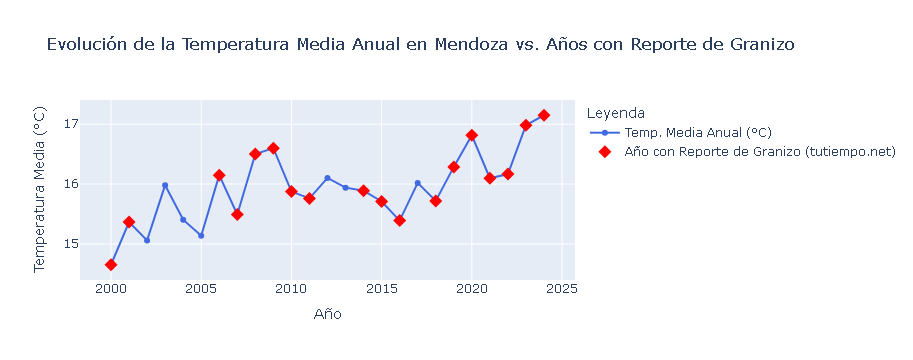

In [7]:
import pandas as pd
import plotly.graph_objects as go

# Suponiendo que 'df' es tu DataFrame consolidado y limpio de la NOAA,
# y 'df_hotlist' es el DataFrame con los años de granizo de tutiempo.net.

print("Preparando los datos para el gráfico de series de tiempo...")

# --- 1. Preparación de Datos ---

# Asegurarnos de que 'date' sea un objeto datetime
df['date'] = pd.to_datetime(df['date'])
# Extraemos el año en una nueva columna
df['año'] = df['date'].dt.year

# Calculamos el promedio anual de las variables clave para todas las estaciones juntas
# Usamos .reset_index() para convertir el resultado de groupby de nuevo en un DataFrame
df_anual = df.groupby('año')[['TAVG', 'TMAX', 'PRCP']].mean().reset_index()


# --- 2. Preparación de los Puntos de Granizo ---

# Vamos a enfocarnos en una estación para que el gráfico sea más claro.
# Podés cambiar "Mendoza Aerodrome" por otra de las estaciones.
hotlist_filtrada = df_hotlist[df_hotlist['station_name'] == "Mendoza Aerodrome"]
años_con_granizo = hotlist_filtrada['año'].unique()

# Filtramos los datos anuales para quedarnos solo con los años donde hubo granizo
df_granizo_anual = df_anual[df_anual['año'].isin(años_con_granizo)]


# --- 3. Creación del Gráfico ---
print("Creando el gráfico...")

# Creamos una figura
fig = go.Figure()

# Añadimos la línea de la evolución de la temperatura media
fig.add_trace(go.Scatter(
    x=df_anual['año'],
    y=df_anual['TAVG'],
    mode='lines+markers',
    name='Temp. Media Anual (°C)',
    line=dict(color='royalblue', width=2)
))

# Añadimos los puntos que marcan los años con reportes de granizo
fig.add_trace(go.Scatter(
    x=df_granizo_anual['año'],
    y=df_granizo_anual['TAVG'],
    mode='markers',
    name='Año con Reporte de Granizo (tutiempo.net)',
    marker=dict(
        color='red',
        size=10,
        symbol='diamond'
    )
))

# Personalizamos el diseño del gráfico
fig.update_layout(
    title_text='Evolución de la Temperatura Media Anual en Mendoza vs. Años con Reporte de Granizo',
    xaxis_title='Año',
    yaxis_title='Temperatura Media (°C)',
    legend_title='Leyenda'
)

fig.show()

# Para guardarlo en HTML
# fig.write_html("../reports/figures/evolucion_clima_vs_granizo.html")

## Unificacion de Csv 

Unificación de posibles eventos de la hotlist con noticias y web scrapping para validación

In [21]:
import pandas as pd
import os

print("Iniciando el proceso final de etiquetado de datos...")

# --- 1. Cargar los dos datasets ---
ruta_noaa = "../data/processed/datos_noaa_mendoza_consolidado.csv"
df = pd.read_csv(ruta_noaa)
df['date'] = pd.to_datetime(df['date']).dt.date

ruta_eventos = "../data/raw/eventos_granizo_limpio.csv"
df_eventos = pd.read_csv(ruta_eventos)
df_eventos['fecha'] = pd.to_datetime(df_eventos['fecha']).dt.date

print("✅ Datasets cargados exitosamente.")

# --- 2. Preparar el DataFrame principal ---
# Inicializamos nuestra columna objetivo con ceros.
df['granizo'] = 0

# --- 3. Lógica de "Inyección" Inteligente ---
# Iteramos sobre cada grupo de eventos que asignaste a una estación.
for estacion_reportada, eventos in df_eventos.groupby('estacion_asignada'):
    
    # Obtenemos la lista de fechas de granizo para este grupo.
    fechas_con_granizo = eventos['fecha'].unique()
    
    # Definimos a qué estaciones del dataset principal les corresponde este evento.
    estaciones_a_marcar = []
    
    # === Lógica para unificar Aero y Observatorio ===
    if estacion_reportada == "MENDOZA AERO, AR":
        print(f"-> Asignando {len(fechas_con_granizo)} fechas de eventos de Gran Mendoza a 'MENDOZA AERO' y 'MENDOZA OBSERVATORIO'.")
        estaciones_a_marcar = ['MENDOZA AERO, AR', 'MENDOZA OBSERVATORIO, AR']
    else:
        # Para el resto, la correspondencia es directa.
        print(f"-> Asignando {len(fechas_con_granizo)} fechas de eventos a '{estacion_reportada}'.")
        estaciones_a_marcar = [estacion_reportada]
        
    # Buscamos en el DF principal las filas que cumplan AMBAS condiciones:
    # 1. La fecha está en nuestra lista de fechas con granizo.
    # 2. El nombre de la estación está en nuestra lista de estaciones a marcar.
    condicion = (df['date'].isin(fechas_con_granizo)) & (df['station_name'].isin(estaciones_a_marcar))
    
    # En esas filas, ponemos un 1 en la columna 'granizo'.
    df.loc[condicion, 'granizo'] = 1

print("\n✅ ¡Columna 'granizo' actualizada con los eventos reales!")

# --- 4. Verificación y Guardado Final ---
print("\n--- Conteo final de días CON (1) y SIN (0) granizo ---")
print(df['granizo'].value_counts())

ruta_final = "../data/processed/dataset_final_etiquetado.csv"
df.to_csv(ruta_final, index=False)
print(f"\n✅ ¡Fase Completada! Dataset final listo para el modelado guardado en: '{ruta_final}'")

Iniciando el proceso final de etiquetado de datos...
✅ Datasets cargados exitosamente.
-> Asignando 21 fechas de eventos a 'MALARGUE AERO, AR'.
-> Asignando 37 fechas de eventos de Gran Mendoza a 'MENDOZA AERO' y 'MENDOZA OBSERVATORIO'.
-> Asignando 12 fechas de eventos a 'SAN MARTIN, AR'.
-> Asignando 19 fechas de eventos a 'SAN RAFAEL AERO, AR'.

✅ ¡Columna 'granizo' actualizada con los eventos reales!

--- Conteo final de días CON (1) y SIN (0) granizo ---
granizo
0    37344
1       55
Name: count, dtype: int64

✅ ¡Fase Completada! Dataset final listo para el modelado guardado en: '../data/processed/dataset_final_etiquetado.csv'


Por una discrepancia en la cantidad de datos vistos y obtenidos, realmente procedemos a unos pasos de validación para encontrar el error.

In [22]:
# Convertimos las fechas de ambos dataframes a un formato consistente
fechas_eventos = set(pd.to_datetime(df_eventos['fecha']).dt.date)
fechas_noaa = set(pd.to_datetime(df['date']).dt.date)

# Usamos la diferencia de conjuntos para encontrar las fechas que están en tu
# lista de eventos pero NO en el dataset de la NOAA
fechas_faltantes = sorted(list(fechas_eventos - fechas_noaa))

print(f"Se encontraron {len(fechas_faltantes)} fechas de tu lista de eventos que no tienen un registro climático en el dataset de la NOAA:")
print(fechas_faltantes)

Se encontraron 1 fechas de tu lista de eventos que no tienen un registro climático en el dataset de la NOAA:
[datetime.date(2024, 11, 20)]


Esta discrepancia quizás se deba a las fechas o nombres en ambos CSV

In [30]:
import pandas as pd

# --- 1. Cargar ambos datasets ---
ruta_noaa = "../data/processed/datos_noaa_mendoza_consolidado.csv"
df = pd.read_csv(ruta_noaa)
df['date'] = pd.to_datetime(df['date']).dt.date

# === RUTA CORREGIDA AQUÍ ===
ruta_eventos = "../data/raw/eventos_granizo_limpio.csv"
df_eventos = pd.read_csv(ruta_eventos)
df_eventos['fecha'] = pd.to_datetime(df_eventos['fecha']).dt.date

print("✅ Datasets cargados para el diagnóstico final.")

# --- 2. Crear las "claves únicas" en ambos DataFrames ---
df['clave_evento'] = df['date'].astype(str) + "_" + df['station_name']
df_eventos['clave_evento'] = df_eventos['fecha'].astype(str) + "_" + df_eventos['estacion_asignada']

# --- 3. Encontrar las claves que NO hicieron "match" ---
claves_eventos_investigados = set(df_eventos['clave_evento'])
claves_existentes_en_noaa = set(df['clave_evento'])

claves_sin_match = sorted(list(claves_eventos_investigados - claves_existentes_en_noaa))

# --- 4. Mostrar el Resultado ---
if claves_sin_match:
    print(f"\n❌ Se encontraron {len(claves_sin_match)} eventos de tu investigación que no encontraron una coincidencia exacta en el dataset de la NOAA.")
    print("Esto puede ser por un nombre de estación incorrecto o porque no hay datos para esa estación en esa fecha específica.")
    print("\n--- Lista de Eventos Sin Coincidencia ---")
    for clave in claves_sin_match:
        print(clave)
else:
    print("\n✅ ¡Felicitaciones! Todos los eventos de tu investigación encontraron una coincidencia perfecta en el dataset de la NOAA.")

✅ Datasets cargados para el diagnóstico final.

❌ Se encontraron 1 eventos de tu investigación que no encontraron una coincidencia exacta en el dataset de la NOAA.
Esto puede ser por un nombre de estación incorrecto o porque no hay datos para esa estación en esa fecha específica.

--- Lista de Eventos Sin Coincidencia ---
2024-11-20_SAN MARTIN, AR


Comparar nombres de las estaciones de ambos CSV

In [25]:
# Suponiendo que 'df' (datos NOAA) y 'df_eventos' (tu investigación) ya están cargados.

# Obtenemos la lista de nombres únicos del dataset principal de la NOAA
nombres_en_noaa = df['station_name'].unique()

# Obtenemos la lista de nombres únicos que usaste en tu archivo de eventos
nombres_en_tu_csv = df_eventos['estacion_asignada'].unique()

print("--- Nombres de Estación en el Dataset de NOAA ---")
print(sorted(nombres_en_noaa))

print("\n--- Nombres de Estación en tu Archivo 'eventos_granizo_limpio.csv' ---")
print(sorted(nombres_en_tu_csv))

--- Nombres de Estación en el Dataset de NOAA ---
['MALARGUE, AR', 'MENDOZA AERO, AR', 'MENDOZA OBSERVATORIO, AR', 'SAN MARTIN, AR', 'SAN RAFAEL, AR']

--- Nombres de Estación en tu Archivo 'eventos_granizo_limpio.csv' ---
['MALARGUE AERO, AR', 'MENDOZA AERO, AR', 'SAN MARTIN, AR', 'SAN RAFAEL AERO, AR']


Se cambiaron los nombres manualmente en Visual Studio Code, se volverá a ejecutar el script para la última validación

In [31]:
# Suponiendo que 'df' (datos NOAA) y 'df_eventos' (tu investigación) ya están cargados.

# Obtenemos la lista de nombres únicos del dataset principal de la NOAA
nombres_en_noaa = df['station_name'].unique()

# Obtenemos la lista de nombres únicos que usaste en tu archivo de eventos
nombres_en_tu_csv = df_eventos['estacion_asignada'].unique()

print("--- Nombres de Estación en el Dataset de NOAA ---")
print(sorted(nombres_en_noaa))

print("\n--- Nombres de Estación en tu Archivo 'eventos_granizo_limpio.csv' ---")
print(sorted(nombres_en_tu_csv))

--- Nombres de Estación en el Dataset de NOAA ---
['MALARGUE, AR', 'MENDOZA AERO, AR', 'MENDOZA OBSERVATORIO, AR', 'SAN MARTIN, AR', 'SAN RAFAEL, AR']

--- Nombres de Estación en tu Archivo 'eventos_granizo_limpio.csv' ---
['MALARGUE, AR', 'MENDOZA AERO, AR', 'SAN MARTIN, AR', 'SAN RAFAEL, AR']


Proceso de unificación final, unión de eventos y datos noaa.

In [32]:
import pandas as pd
import os

print("Iniciando el proceso final de etiquetado de datos...")

# --- 1. Cargar los dos datasets desde sus rutas correctas ---
try:
    # Cargamos el dataset principal de la NOAA
    ruta_noaa = "../data/processed/datos_noaa_mendoza_consolidado.csv"
    df = pd.read_csv(ruta_noaa)
    df['date'] = pd.to_datetime(df['date']).dt.date # Nos aseguramos que la fecha no tenga hora

    # Cargamos tu archivo con las fechas de granizo confirmadas
    ruta_eventos = "../data/raw/eventos_granizo_limpio.csv"
    df_eventos = pd.read_csv(ruta_eventos)
    df_eventos['fecha'] = pd.to_datetime(df_eventos['fecha']).dt.date
    
    print("✅ Datasets cargados exitosamente.")

except FileNotFoundError as e:
    print(f"❌ ERROR: No se encontró un archivo. Revisa la ruta: {e.fname}")
    df = pd.DataFrame() # Creamos un df vacío para que no falle el resto del código

if not df.empty:
    # --- 2. Preparar el DataFrame principal ---
    # Inicializamos nuestra columna objetivo con ceros.
    df['granizo'] = 0

    # --- 3. Lógica de "Inyección" Inteligente ---
    # Iteramos sobre cada grupo de eventos que asignaste a una estación.
    for estacion_reportada, eventos in df_eventos.groupby('estacion_asignada'):
        
        # Obtenemos la lista de fechas de granizo para este grupo.
        fechas_con_granizo = eventos['fecha'].unique()
        
        # Definimos a qué estaciones del dataset principal les corresponde este evento.
        estaciones_a_marcar = []
        
        # Lógica para unificar Aero y Observatorio
        if estacion_reportada == "MENDOZA AERO, AR":
            print(f"-> Asignando {len(fechas_con_granizo)} fechas de eventos de Gran Mendoza a 'MENDOZA AERO' y 'MENDOZA OBSERVATORIO'.")
            estaciones_a_marcar = ['MENDOZA AERO, AR', 'MENDOZA OBSERVATORIO, AR']
        else:
            # Para el resto, la correspondencia es directa.
            print(f"-> Asignando {len(fechas_con_granizo)} fechas de eventos a '{estacion_reportada}'.")
            estaciones_a_marcar = [estacion_reportada]
            
        # Buscamos en el DF principal las filas que cumplan AMBAS condiciones:
        # 1. La fecha está en nuestra lista de fechas con granizo.
        # 2. El nombre de la estación está en nuestra lista de estaciones a marcar.
        condicion = (df['date'].isin(fechas_con_granizo)) & (df['station_name'].isin(estaciones_a_marcar))
        
        # En esas filas, ponemos un 1 en la columna 'granizo'.
        df.loc[condicion, 'granizo'] = 1

    print("\n✅ ¡Columna 'granizo' actualizada con los eventos reales!")

    # --- 4. Verificación y Guardado Final ---
    print("\n--- Conteo final de días CON (1) y SIN (0) granizo ---")
    print(df['granizo'].value_counts())

    # Guardamos el dataset final y etiquetado en la carpeta 'processed'
    os.makedirs("../data/processed/", exist_ok=True) # Nos aseguramos que la carpeta exista
    ruta_final = "../data/processed/dataset_final_etiquetado.csv"
    df.to_csv(ruta_final, index=False)
    print(f"\n✅ ¡Fase Completada! Dataset final listo para el modelado guardado en: '{ruta_final}'")

Iniciando el proceso final de etiquetado de datos...
✅ Datasets cargados exitosamente.
-> Asignando 21 fechas de eventos a 'MALARGUE, AR'.
-> Asignando 37 fechas de eventos de Gran Mendoza a 'MENDOZA AERO' y 'MENDOZA OBSERVATORIO'.
-> Asignando 12 fechas de eventos a 'SAN MARTIN, AR'.
-> Asignando 19 fechas de eventos a 'SAN RAFAEL, AR'.

✅ ¡Columna 'granizo' actualizada con los eventos reales!

--- Conteo final de días CON (1) y SIN (0) granizo ---
granizo
0    37304
1       95
Name: count, dtype: int64

✅ ¡Fase Completada! Dataset final listo para el modelado guardado en: '../data/processed/dataset_final_etiquetado.csv'
